In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Exploratory Data Analysis

In [102]:
us_data = pd.read_csv('../data/USvideos.csv')
us_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [119]:
#
most_views = us_data.groupby("channel_title")['views'].sum().sort_values(ascending=False)

most_views_pd = most_views.to_frame().head(10).sort_values(by = 'views', ascending=True)

most_views_pd

,views
channel_title,
BeckyGVEVO,1182971286
FoxStarHindi,1238609854
Sony Pictures Entertainment,1432374398
jypentertainment,1486972132
MalumaVEVO,1551515831
ArianaGrandeVevo,1576959172
Marvel Entertainment,1808998971
Dude Perfect,1870085178
ibighit,2235906679


Text(0.5, 1.0, 'The most viewed YouTube Channels in 2011')

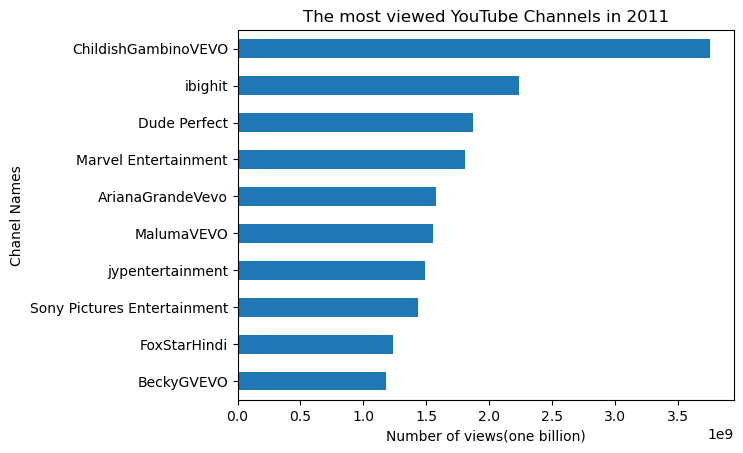

In [123]:
most_views_pd['views'].plot(kind="barh")


plt.xlabel('Number of views(one billion)')
plt.ylabel('Chanel Names')
plt.title('The most viewed YouTube Channels in 2011')
#plt.xticks(ind, ('T1', 'T2', 'T3', 'T4', 'T5'))
#plt.yticks(np.arange(0, 81, 10))
#plt.legend((p1[0], p2[0]), ('', 'girls'))